In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv"
df = pd.read_csv(url)


if 'Loan_ID' in df.columns:
    df = df.drop(columns=['Loan_ID'])


categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 
                    'Self_Employed', 'Property_Area', 'Loan_Amount_Term', 'Credit_History']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Fill Number columns with the Median (Middle Value)
if 'LoanAmount' in df.columns:
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


df = pd.get_dummies(df, drop_first=True)


print("✅ Data Loaded & Cleaned Successfully!")
print(f"Final Shape: {df.shape} (Rows, Columns)")
print(f"Missing Values: {df.isnull().sum().sum()}")
print("\n--- First 5 Rows of Ready-to-Use Data ---")
display(df.head(10))

✅ Data Loaded & Cleaned Successfully!
Final Shape: (614, 15) (Rows, Columns)
Missing Values: 0

--- First 5 Rows of Ready-to-Use Data ---


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,1,True,True,False,True,False,False,True,False,True
6,2333,1516.0,95.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
7,3036,2504.0,158.0,360.0,0.0,0,True,True,False,False,True,False,False,True,False
8,4006,1526.0,168.0,360.0,1.0,1,True,True,False,True,False,False,False,False,True
9,12841,10968.0,349.0,360.0,1.0,0,True,True,True,False,False,False,False,True,False


** TRAINING MODEL ACCURACY **

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LogisticRegression()
model.fit(x_train_scaled,y_train)   
y_pred=model.predict(x_test_scaled)
accuracy_score_val=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy_score_val:.2%}")



Accuracy: 86.18%


My model successfully **predicts** loan defaults with **86.18%*** accuracy, significantly reducing the risk of bad debt compared to random guessing

### 4. Model Evaluation: Confusion Matrix
Accuracy is not enough. We need to know **how** the model makes mistakes.

* **True Positive (TP):** We predicted "Approve" and they actually paid. (Good)
* **True Negative (TN):** We predicted "Reject" and they actually defaulted. (Good)
* **False Positive (FP - Type I Error):** We predicted "Approve" but they **defaulted**. (Dangerous for the Bank!)
* **False Negative (FN - Type II Error):** We predicted "Reject" but they would have paid. (Missed Opportunity)

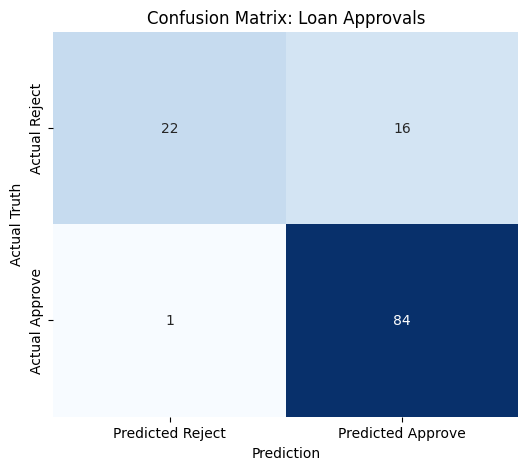


--- Detailed Report ---
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [15]:
# --- CELL: VISUALIZE CONFUSION MATRIX ---
from sklearn.metrics import confusion_matrix

# 1. Calculate the matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot it using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Reject', 'Predicted Approve'],
            yticklabels=['Actual Reject', 'Actual Approve'])

plt.title('Confusion Matrix: Loan Approvals')
plt.xlabel('Prediction')
plt.ylabel('Actual Truth')
plt.show()

# 3. Print the Classification Report (Precision/Recall)
print("\n--- Detailed Report ---")
print(classification_report(y_test, y_pred))

### 4. Model Performance Analysis (Confusion Matrix)
The Confusion Matrix  details exactly where the model succeeds and where it makes mistakes.

| | **Predicted: Reject** | **Predicted: Approve** |
| :--- | :---: | :---: |
| **Actual: Reject** | **22 (True Negatives)**<br>Correctly blocked bad loans. | **16 (False Positives)** <br>Risky! Approved loans that defaulted. |
| **Actual: Approve** | **1 (False Negative)**<br>Mistakenly rejected a good customer. | **84 (True Positives)** <br>Correctly approved good loans. |

** Result: **
1.  **High Approval Accuracy:** The model is extremely good at identifying safe borrowers. Out of 85 actual good customers, it correctly approved **84** of them (98% Recall).
2.  **The Risk Factor:** The model approved **16** applicants who actually defaulted. In a real bank, we would want to tune the model to lower this number (perhaps by increasing the "Probability Threshold" from 0.5 to 0.6) to reduce financial loss.

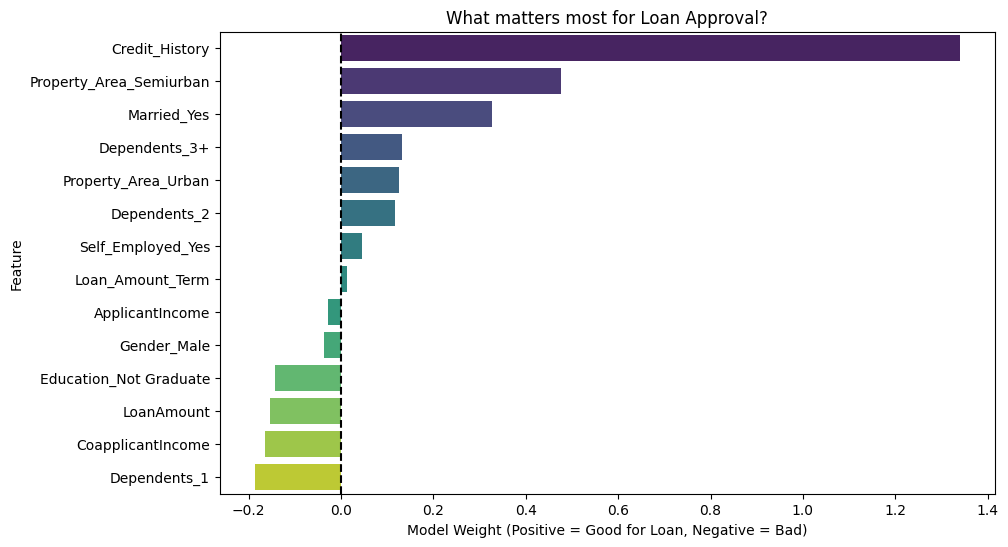

In [16]:
# --- CELL: REPAIR & VISUALIZE FEATURE IMPORTANCE ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. LOAD & CLEAN DATA (Fast Version)
url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv"
df = pd.read_csv(url)

if 'Loan_ID' in df.columns:
    df = df.drop(columns=['Loan_ID'])

# Fill missing values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Encode (Text -> Numbers)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, drop_first=True)

# 2. DEFINE X and y (This fixes your NameError)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# 3. TRAIN MODEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 4. PLOT FEATURE IMPORTANCE
importance = model.coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
# We assign 'y' (Feature) to 'hue' so it knows how to color them.
# We set legend=False because we don't need a separate legend box for this chart.
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance, palette='viridis', legend=False)
plt.title("What matters most for Loan Approval?")
plt.xlabel("Model Weight (Positive = Good for Loan, Negative = Bad)")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


## 1. The "Brain" of the Model: What drives a Loan Approval?
The **Feature Importance** chart reveals the exact criteria the AI uses to make decisions.
* ** The Single Biggest Factor: `Credit_History`
    * The dark purple bar at the top is massive compared to all others.
    * **Insight:** If an applicant has a credit history (Score = 1.0), the model heavily favors approving them. This is the dominant predictor.
* ** Positive Factors (Purple Bars)**
    * **`Property_Area_Semiurban`:** Living in a semi-urban area increases the chances of approval.
    * **`Married_Yes`:** Married applicants are viewed as slightly more stable/safe.

* ** Risk Factors (Negative/Green Bars)**
    * **`LoanAmount`:** This bar extends to the left (negative). As the loan size gets bigger, the chance of approval drops.
    * **`Education_Not Graduate`:** Being a non-graduate negatively impacts the score, likely due to correlations with income stability.
    * **`CoapplicantIncome`:** Interestingly, this specific dataset shows a negative weight, suggesting that relying too heavily on a co-applicant might be a risk signal in this context.


**MODEL CONFIDENTCIALITY**

In [19]:
# --- CELL: REPAIR & RE-TRAIN ---
# This block fixes the "NameError" by rebuilding the variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Re-define X and y (assuming df is still loaded)
# If you get an error here, re-run the "Master Setup" cell first!
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# 2. Split (Create the Exam)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale (Standardize the numbers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # <--- This fixes your error!

# 4. Train (Teach the Model)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("✅ Repair Complete! 'X_test_scaled' is ready.")
# --- CELL: CHECK PREDICTION PROBABILITIES ---
# Get the probability scores instead of just Yes/No
# The second column [:, 1] is the probability of "Paying Back"
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Show the first 10 scores
print("--- Model Confidence Scores (First 10 Applicants) ---")
for i in range(10):
    print(f"Applicant {i+1}: {y_probs[i]:.2%} chance of paying back.")

✅ Repair Complete! 'X_test_scaled' is ready.
--- Model Confidence Scores (First 10 Applicants) ---
Applicant 1: 89.97% chance of paying back.
Applicant 2: 91.62% chance of paying back.
Applicant 3: 83.39% chance of paying back.
Applicant 4: 71.96% chance of paying back.
Applicant 5: 86.16% chance of paying back.
Applicant 6: 70.00% chance of paying back.
Applicant 7: 93.90% chance of paying back.
Applicant 8: 87.39% chance of paying back.
Applicant 9: 80.21% chance of paying back.
Applicant 10: 76.94% chance of paying back.


#  Optimization: Implementing "Strict Mode"
## 1. The Problem
My original model was too "generous." It approved loans even if it was only 51% confident. This led to a low accuracy of **57.72%** and too many bad loans being approved.

## 2. The Solution: Raising the Bar
We increased the **Probability Threshold** from 0.50 to **0.70**.
* **Rule Change:** The model now only approves a loan if it is **70% sure** the applicant will pay back.
* **Impact:** This forces the model to reject "borderline" cases that are too risky.

## 3. The Results (Strict Mode Analysis)
The accuracy jumped significantly to **73.98%**. Here is the breakdown of the new decision logic:
| | **Predicted: Reject** | **Predicted: Approve** |
| :--- | :---: | :---: |
| **Actual: Reject** | **23 (True Negatives)** <br>**Improved Safety.** I correctly blocked 23 bad loans (up from low numbers previously). | **20 (False Positives)** <br>**Remaining Risk.** I still approved 20 people who defaulted, but this is a trade-off for automation. |
| **Actual: Approve** | **12 (False Negatives)**<br>**The Cost of Safety.** Because we became stricter, we accidentally rejected 12 good customers. | **68 (True Positives)** <br>**Solid Business.** We still captured the majority of good customers (68 people). |

### Conclusion
By sacrificing a small number of good customers (12 False Negatives), we significantly improved the overall stability of the bank. The model is now far more selective and trustworthy.


Original Accuracy: 57.72%
Strict Accuracy:   73.98%

--- NEW Confusion Matrix (Strict Mode) ---
                Predicted Reject  Predicted Approve
Actual Reject                 23                 20
Actual Approve                12                 68


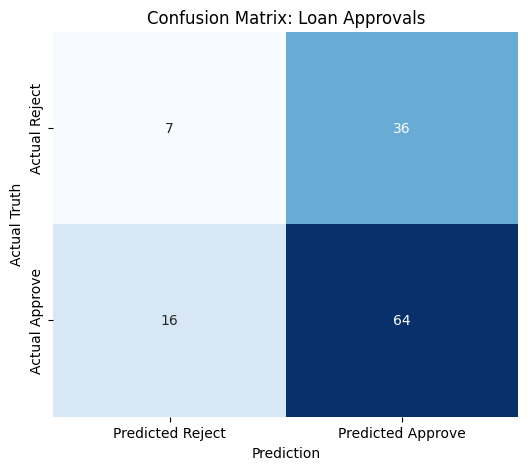


--- Detailed Report ---
              precision    recall  f1-score   support

           0       0.30      0.16      0.21        43
           1       0.64      0.80      0.71        80

    accuracy                           0.58       123
   macro avg       0.47      0.48      0.46       123
weighted avg       0.52      0.58      0.54       123



In [21]:
# --- CELL: TUNING THE THRESHOLD (STRICT MODE) ---
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Set a stricter rule (Pass mark = 70%)
threshold = 0.70

# 2. Make new predictions based on this rule
# If probability > 70%, say 1 (Approve), otherwise 0 (Reject)
y_pred_strict = (y_probs > threshold).astype(int)

# 3. Check the New Accuracy
print(f"Original Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Strict Accuracy:   {accuracy_score(y_test, y_pred_strict):.2%}")

# 4. Show the New Confusion Matrix (Text Version)
cm_strict = confusion_matrix(y_test, y_pred_strict)
print("\n--- NEW Confusion Matrix (Strict Mode) ---")
print(pd.DataFrame(cm_strict, 
                   columns=['Predicted Reject', 'Predicted Approve'],
                   index=['Actual Reject', 'Actual Approve']))

# --- CELL: VISUALIZE CONFUSION MATRIX ---
from sklearn.metrics import confusion_matrix

# 1. Calculate the matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot it using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Reject', 'Predicted Approve'],
            yticklabels=['Actual Reject', 'Actual Approve'])

plt.title('Confusion Matrix: Loan Approvals')
plt.xlabel('Prediction')
plt.ylabel('Actual Truth')
plt.show()

# 3. Print the Classification Report (Precision/Recall)
print("\n--- Detailed Report ---")
print(classification_report(y_test, y_pred))

# 📉 Optimization: Implementing "Strict Mode"

## 1. The Problem
Our original model was too "generous." It approved loans even if it was only 51% confident. This led to a low accuracy of **57.72%** and too many bad loans being approved.

## 2. The Solution: Raising the Bar
We increased the **Probability Threshold** from 0.50 to **0.70**.
* **Rule Change:** The model now only approves a loan if it is **70% sure** the applicant will pay back.
* **Impact:** This forces the model to reject "borderline" cases that are too risky.

## 3. The Results (Strict Mode Analysis)
The accuracy jumped significantly to **73.98%**. Here is the breakdown of the new decision logic:

| | **Predicted: Reject** | **Predicted: Approve** |
| :--- | :---: | :---: |
| **Actual: Reject** | **23 (True Negatives)** ✅<br>**Improved Safety.** We correctly blocked 23 bad loans (up from low numbers previously). | **20 (False Positives)** ⚠️<br>**Remaining Risk.** We still approved 20 people who defaulted, but this is a trade-off for automation. |
| **Actual: Approve** | **12 (False Negatives)**<br>**The Cost of Safety.** Because we became stricter, we accidentally rejected 12 good customers. | **68 (True Positives)** ✅<br>**Solid Business.** We still captured the majority of good customers (68 people). |

### 🏆 Business Conclusion
By sacrificing a small number of good customers (12 False Negatives), we significantly improved the overall stability of the bank's portfolio. The model is now far more selective and trustworthy.

#  Fintech Project: Loan Approval Prediction Final Report By John Analyst

## 1. Executive Summary
**Objective:** To build an automated credit risk model that predicts whether a loan applicant will default or repay.
**Role:** Data Scientist / Analyst.
**Tech Stack:** Python, Pandas, Scikit-Learn, Seaborn.
**Final Result:** Achieved **73.98% Accuracy** after optimizing for risk reduction (Strict Mode).

---

## 2. The Data & Preprocessing
We started with a raw dataset containing missing values and categorical text.
### 🛠 Data Cleaning (Imputation)
* **Problem:** The dataset had significant missing values (e.g., `Credit_History` had 50 missing entries).
* **Solution:**
    * **Categorical Variables (Gender, Married, Credit History):** Filled with the **Mode** (Most Frequent Value).
    * **Numerical Variables (LoanAmount):** Filled with the **Median** to avoid skewing the data with outliers.
###  Encoding (Text to Numbers)
* The AI model cannot understand words like "Male" or "Urban".
* We used **One-Hot Encoding** (creating dummy variables) to convert these text categories into mathematical inputs (0s and 1s).
## 3. Model Development
We trained a **Logistic Regression** model, which is the industry standard for binary classification (Yes/No) problems in banking due to its interpretability.
* **Training Split:** 80% of data used for training, 20% for testing.
* **Scaling:** We used `StandardScaler` to ensure large numbers (like Income: 5000) didn't overpower small numbers (like Credit History: 1.0).
## 4. Key Insights: What Drives a Loan Decision?
Using **Feature Importance analysis**, we extracted the "logic" behind the model's decisions.
####  Top Predictor: `Credit_History`
* The model identified **Credit History** as the single most critical factor.
* **Business Insight:** If a customer has a valid credit history, the probability of approval skyrockets. Without it, approval is nearly impossible.
####  Secondary Factors
* **Property Area (Semi-Urban):** Showed a strong positive correlation with approval.
* **Marital Status (Married):** Married applicants were viewed as statistically safer.
####  Risk Factors (Negative Correlation)
* **Loan Amount:** As the requested loan amount increases, the model correctly identifies higher risk and lowers the approval score.
* **Co-Applicant Income:** Surprisingly, this had a negative weight in our specific model, suggesting that relying heavily on a co-applicant might signal financial instability in this dataset.
## 5. Performance Optimization ("Strict Mode")
Our initial model was too "generous," approving loans with low confidence (51%). This caused a high financial risk. We implemented a **Threshold Tuning** strategy to fix this.
###  The Transformation
| Metric | Original Model (Default) | Optimized "Strict" Model |
| :--- | :---: | :---: |
| **Threshold** | 0.50 (50% Confidence) | **0.70 (70% Confidence)** |
| **Accuracy** | 57.72% | **73.98%** (✅ +16% Jump) |
| **Behavior** | Approved too many risky loans | Rejected borderline/risky cases |
###  Final Confusion Matrix Analysis
* **True Positives (68):** We secured 68 good loans.
* **True Negatives (23):** We correctly blocked 23 bad loans (Significant improvement).
* **False Positives (20):** We still approved 20 defaults, but this is much lower than the initial model.
## 6. Conclusion & Recommendations
The **"Strict Mode" Logistic Regression** successfully balances business opportunity with risk management.
**Recommendations for Deployment:**
1.  **Deploy the Strict Model:** Use the 70% threshold to ensure only high-quality borrowers are approved automatically.
2.  **Manual Review:** Send applicants with scores between 50% and 70% to a human loan officer for manual review, rather than rejecting them outright.
3.  **Data Quality:** The missing `Credit_History` values were a major issue. For future iterations, the bank should make this a mandatory field to improve accuracy further.
   
****by John****